# Analysis of Variance (ANOVA)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import scipy.stats as stats

About the dataset CarPrice_Assignment.csv

https://www.kaggle.com/datasets/aminesnoussi/carprice-assignmentcsv?resource=download

In [3]:
# Load the data
rep = '/Users/davidtbo/Documents/Data_Science/99_Data'
df = pd.read_csv(os.path.join(rep, 'CarPrice_Assignment.csv'))

In [4]:
'''

STATISTICAL COMPARISON OF GROUPS

'''

'\n\nSTATISTICAL COMPARISON OF GROUPS\n\n'

In [6]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [13]:
# We create the variable "make":

df['make'] = df['CarName'].apply(lambda x : str(x).split()[0])

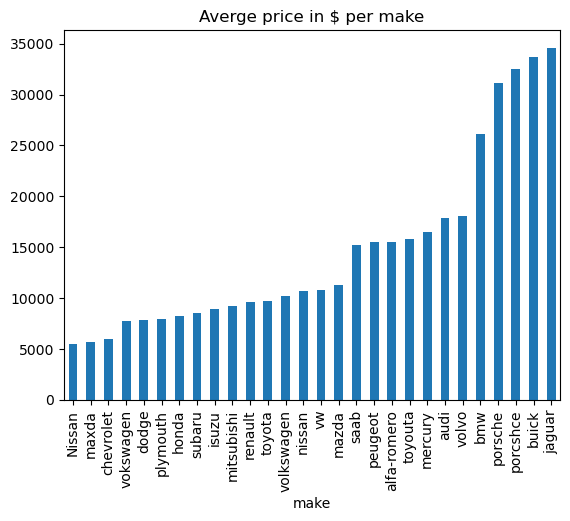

In [18]:
df.groupby('make')['price'].mean().sort_values().plot(kind='bar')
plt.title('Averge price in $ per make')
plt.show()

We can see a trend of increasing prices as we move right along of the graph.  
But which category of the make feature has the most and has the least impact on the price prediction ?  
To analyse categorical variable such as "make" variable we can use ANOVA method:

# Why do we perform ANOVA ?

- Finding correlation between different groups of a categorical variables.

## What do we obtain from ANOVA ?

- F-test score : variation between sample group means divided by variation within sample group

In [19]:
from IPython.display import HTML

# Chemin vers le fichier .png
image_path = '/Users/davidtbo/Documents/Data_Science/03_Linear_Model/png/anova.png'

# Afficher l'image en utilisant une balise HTML
display(HTML(f'<img src="{image_path}" width="800">'))

source https://www.datanovia.com/en/lessons/anova-in-r/  

BAsics

Assume that we have 3 groups to compare, as illustrated in the image above. The dashed line indicates the group mean.  
The figure shows the variation between the means of the groups (panel A) and the variation within each group (panel B), also known as residual variance.

The idea behind the ANOVA test is very simple: 
- if the average variation between groups is large enough compared to the average variation within groups, then you could conclude that at least one group mean is not equal to the others.

Thus, it’s possible to evaluate whether the differences between the group means are significant by comparing the two variance estimates.  
This is why the method is called analysis of variance even though the main goal is to compare the group means.

Briefly, the mathematical procedure behind the ANOVA test is as follow:

Compute the within-group variance, also known as residual variance.  
This tells us, how different each participant is from their own group mean (see figure, panel B).  
Compute the variance between group means (see figure, panel A).  
Produce the F-statistic as the **ratio of Sum of variance.between.groups / Sum of variance.within.groups**

Note that, a lower F value (F < 1) indicates that there are no significant difference between the means of the samples being compared.  

However, a higher ratio implies that the variation among group means are greatly different from each other compared to the variation of the individual observations in each groups.

Assumptions

The ANOVA test makes the following assumptions about the data:

Independence of the observations. Each subject should belong to only one group.  
There is no relationship between the observations in each group. Having repeated measures for the same participants is not allowed.
No significant outliers in any cell of the design 
Normality. the data for each design cell should be approximately normally distributed.  
Homogeneity of variances. The variance of the outcome variable should be equal in every cell of the design.  
Before computing ANOVA test, you need to perform some preliminary tests to check if the assumptions are met.

Note that, if the above assumptions are not met there are a non-parametric alternative (Kruskal-Wallis test) to the one-way ANOVA.

Unfortunately, there are no non-parametric alternatives to the two-way and the three-way ANOVA.  Thus, in the situation where the assumptions are not met, you could consider running the two-way/three-way ANOVA on the transformed and non-transformed data to see if there are any meaningful differences.


In [30]:
# Group Honda's prices:

mask = df['make'] == 'honda'
group_honda = df[mask]['price']

In [31]:
# Group Subaru's prices:

mask = df['make'] == 'subaru'
group_subaru = df[mask]['price']

In [36]:
# ANOVA F-test:

import scipy.stats as stats

stats.f_oneway(group_honda, group_subaru)

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

F-test is small but the large pvalue makes the result uncertain.

Let's try another test between, Honda and Jaguar.

In [37]:
# Group Subaru's prices:

mask = df['make'] == 'jaguar'
group_jaguar = df[mask]['price']

In [38]:
stats.f_oneway(group_honda, group_jaguar)

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

F-statisic is large and pvalue < 0.001 (certain of the result).  

In this case we can conclude that the prices between "Honda" and "Jaguar" are significantly different.